<a href="https://colab.research.google.com/github/fattorilaura/INAIL/blob/main/INAIL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing useful libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##Uploading main dataset 

In [9]:
#uploading INAIL merged dataset as previosly taken from Kaggle and saved in Drive
inail_row_df = pd.read_csv('drive/MyDrive/inail_inail.csv',dtype={'DeathDate':object})


##Uploading other datasets

In [10]:
#uploading attributes description and values as taken from INAIL web site and saved in Drive
nascita_df = pd.read_csv('drive/MyDrive/LuogoNascita.csv')


##Firts exploration

In [30]:
inail_row_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6299160 entries, 0 to 6299159
Data columns (total 25 columns):
 #   Column                                Non-Null Count    Dtype 
---  ------                                --------------    ----- 
 0   DetectionDate                         6299160 non-null  object
 1   ProtocolDate                          6299160 non-null  object
 2   DateOfEvent                           6299160 non-null  object
 3   DefinitionDate                        6299160 non-null  object
 4   DeathDate                             12742 non-null    object
 5   PlaceOfOccurrence                     6299160 non-null  int64 
 6   AaccidentIdentification               6299160 non-null  int64 
 7   Gender                                6299160 non-null  object
 8   Age                                   6299160 non-null  int64 
 9   PlaceOfBirth                          6299160 non-null  object
 10  ModesOfOccurrence                     6299160 non-null  object
 11

In [13]:
inail_row_df.head().T

,0,1,2,3,4
DetectionDate,30/04/2021,30/04/2021,30/04/2021,30/04/2021,30/04/2021
ProtocolDate,25/06/2018,14/06/2019,15/04/2020,23/12/2020,30/10/2017
DateOfEvent,22/06/2018,12/06/2019,01/04/2020,20/12/2020,26/10/2017
DefinitionDate,15/08/2018,04/07/2019,05/05/2020,19/01/2021,21/11/2017
DeathDate,NaN,NaN,NaN,NaN,NaN
PlaceOfOccurrence,20,27,27,22,84
AaccidentIdentification,13989297,8214943,24675768,12711994,4770289
Gender,F,F,F,F,M
Age,54,61,49,47,40
PlaceOfBirth,ITAL,ITAL,ITAL,Z127,ITAL


##Removing uninteresting columns

In [14]:
inail_df=inail_row_df.drop(['DetectionDate', 'ProtocolDate', 'DefinitionDate', 'AdministrativeDefinition', 'AdministrativeDefinitionFatalOutcome', 'Compensation', 'InstructionalDecisionFatalOutcome', 'Management', 'TariffManagement', 'LargeTariffGroup'], axis=1)

In [15]:
inail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6299160 entries, 0 to 6299159
Data columns (total 15 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   DateOfEvent                   object
 1   DeathDate                     object
 2   PlaceOfOccurrence             int64 
 3   AaccidentIdentification       int64 
 4   Gender                        object
 5   Age                           int64 
 6   PlaceOfBirth                  object
 7   ModesOfOccurrence             object
 8   WithOrWithoutTransport        object
 9   CaseID                        int64 
 10  DegreeOfImpairment            int64 
 11  DegreeCompensated             int64 
 12  EmployerIdentification        int64 
 13  TerritorialInsurancePosition  int64 
 14  EconomicActivitySector        object
dtypes: int64(8), object(7)
memory usage: 720.9+ MB


##Renaming and resorting columns for better reading

In [16]:
#renaming columns
inail_df.rename(columns = {'PlaceOfOccurrence':'PlaceOfEvent', 'AaccidentIdentification':'PersonID','ModesOfOccurrence':'InItinere','WithOrWithoutTransport':'InvolvingVehicles','DegreeOfImpairment':'Impairment%', 'DegreeCompensated':'CompensatedDays', 'EmployerIdentification':'EmployerID', 'TerritorialInsurancePosition':'PlantID','EconomicActivitySector':'EconomicSectorID'}, inplace=True)

In [29]:
inail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3149580 entries, 0 to 6283006
Data columns (total 15 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   CaseID             int64 
 1   DateOfEvent        object
 2   PlaceOfEvent       int64 
 3   PersonID           int64 
 4   Gender             object
 5   Age                int64 
 6   PlaceOfBirth       object
 7   EmployerID         int64 
 8   PlantID            int64 
 9   EconomicSectorID   object
 10  InItinere          object
 11  InvolvingVehicles  object
 12  Impairment%        int64 
 13  CompensatedDays    int64 
 14  DeathDate          object
dtypes: int64(8), object(7)
memory usage: 384.5+ MB


In [18]:
#resorting columns
inail_df=inail_df.reindex(columns=['CaseID','DateOfEvent','PlaceOfEvent','PersonID','Gender','Age','PlaceOfBirth','EmployerID','PlantID','EconomicSectorID','InItinere','InvolvingVehicles','Impairment%','CompensatedDays','DeathDate'])

In [19]:
inail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6299160 entries, 0 to 6299159
Data columns (total 15 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   CaseID             int64 
 1   DateOfEvent        object
 2   PlaceOfEvent       int64 
 3   PersonID           int64 
 4   Gender             object
 5   Age                int64 
 6   PlaceOfBirth       object
 7   EmployerID         int64 
 8   PlantID            int64 
 9   EconomicSectorID   object
 10  InItinere          object
 11  InvolvingVehicles  object
 12  Impairment%        int64 
 13  CompensatedDays    int64 
 14  DeathDate          object
dtypes: int64(8), object(7)
memory usage: 720.9+ MB


In [20]:
inail_df.head(15)

,CaseID,DateOfEvent,PlaceOfEvent,PersonID,Gender,Age,PlaceOfBirth,EmployerID,PlantID,EconomicSectorID,InItinere,InvolvingVehicles,Impairment%,CompensatedDays,DeathDate
0,21587784,22/06/2018,20,13989297,F,54,ITAL,4120339,7478870,Q 87,N,N,-1,15,NaN
1,22385662,12/06/2019,27,8214943,F,61,ITAL,4771081,1982508,Q 87,N,N,-1,15,NaN
2,22923003,01/04/2020,27,24675768,F,49,ITAL,3490613,10687622,Q 87,N,N,-1,15,NaN
3,23351299,20/12/2020,22,12711994,F,47,Z127,5774459,3965254,Q 87,N,N,-1,15,NaN
4,21012366,26/10/2017,84,4770289,M,40,ITAL,6776721,8372342,Q 87,N,N,-1,15,NaN
5,19988076,30/05/2016,17,10039229,F,60,ITAL,4746259,4907406,Q 87,N,N,-1,15,NaN
6,21480553,19/04/2018,58,12276242,F,38,ITAL,5819924,6280132,Q 87,N,N,-1,15,NaN
7,22476586,19/08/2019,42,32713046,F,23,ITAL,9025319,11215204,Q 87,S,S,-1,15,NaN
8,23352522,11/11/2020,26,4681996,F,48,ITAL,4163131,5311982,Q 87,N,N,-1,15,NaN
9,19436224,07/04/2016,32,9861135,F,33,ITAL,5718923,4030091,Q 87,N,N,-1,15,NaN


##Cleaning

In [21]:
inail_df['CaseID'].value_counts()

21587784    2
22817166    2
23320554    2
21756833    2
22450142    2
           ..
20371731    2
23184724    2
23259352    2
20983235    2
22356947    2
Name: CaseID, Length: 3149580, dtype: int64

In [22]:
#apparently there are duplicates, let's see if there where in the original dataset or if we dropped any important column
inail_row_df.drop_duplicates().info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3149580 entries, 0 to 6283006
Data columns (total 25 columns):
 #   Column                                Dtype 
---  ------                                ----- 
 0   DetectionDate                         object
 1   ProtocolDate                          object
 2   DateOfEvent                           object
 3   DefinitionDate                        object
 4   DeathDate                             object
 5   PlaceOfOccurrence                     int64 
 6   AaccidentIdentification               int64 
 7   Gender                                object
 8   Age                                   int64 
 9   PlaceOfBirth                          object
 10  ModesOfOccurrence                     object
 11  WithOrWithoutTransport                object
 12  CaseID                                int64 
 13  AdministrativeDefinition              object
 14  AdministrativeDefinitionFatalOutcome  object
 15  Compensation                    

In [23]:
inail_df.drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3149580 entries, 0 to 6283006
Data columns (total 15 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   CaseID             int64 
 1   DateOfEvent        object
 2   PlaceOfEvent       int64 
 3   PersonID           int64 
 4   Gender             object
 5   Age                int64 
 6   PlaceOfBirth       object
 7   EmployerID         int64 
 8   PlantID            int64 
 9   EconomicSectorID   object
 10  InItinere          object
 11  InvolvingVehicles  object
 12  Impairment%        int64 
 13  CompensatedDays    int64 
 14  DeathDate          object
dtypes: int64(8), object(7)
memory usage: 384.5+ MB


In [24]:
#removing duplicates
inail_df.drop_duplicates(inplace=True)

In [25]:
inail_df['CaseID'].value_counts()

21587784    1
22817166    1
23320554    1
21756833    1
22450142    1
           ..
20371731    1
23184724    1
23259352    1
20983235    1
22356947    1
Name: CaseID, Length: 3149580, dtype: int64

##More exploring

In [35]:
inail_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CaseID,3149580.0,2.152394e+07,1.144760e+06,1420664.0,20593000.25,21608439.5,22513012.25,23572645.0
PlaceOfEvent,3149580.0,4.151611e+01,2.797904e+01,1.0,18.00,36.0,59.00,111.0
PersonID,3149580.0,1.338861e+07,9.441078e+06,-1.0,7000132.25,12806637.0,14054151.25,33156557.0
Age,3149580.0,3.997317e+01,1.522930e+01,-1.0,29.00,42.0,52.00,90.0
EmployerID,3149580.0,3.988521e+06,3.452447e+06,-1.0,-1.00,3888938.0,6708149.75,10820372.0
PlantID,3149580.0,5.107884e+06,4.769339e+06,-1.0,-1.00,4574661.0,9844311.00,13665863.0
Impairment%,3149580.0,-1.740578e-01,3.419467e+00,-1.0,-1.00,-1.0,-1.00,100.0
CompensatedDays,3149580.0,1.969991e+01,4.435400e+01,0.0,0.00,3.0,20.00,1832.0


In [31]:
inail_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3149580 entries, 0 to 6283006
Data columns (total 15 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   CaseID             3149580 non-null  int64 
 1   DateOfEvent        3149580 non-null  object
 2   PlaceOfEvent       3149580 non-null  int64 
 3   PersonID           3149580 non-null  int64 
 4   Gender             3149580 non-null  object
 5   Age                3149580 non-null  int64 
 6   PlaceOfBirth       3149580 non-null  object
 7   EmployerID         3149580 non-null  int64 
 8   PlantID            3149580 non-null  int64 
 9   EconomicSectorID   3149580 non-null  object
 10  InItinere          3149580 non-null  object
 11  InvolvingVehicles  3149580 non-null  object
 12  Impairment%        3149580 non-null  int64 
 13  CompensatedDays    3149580 non-null  int64 
 14  DeathDate          6371 non-null     object
dtypes: int64(8), object(7)
memory usage: 384.5+ MB


In [33]:
inail_df['DeathDate'].isnull().sum()

3143209

In [52]:
#creating a specific dataset for fatal cases
fatal_df=inail_df[inail_df['DeathDate'].notna()]
fatal_df.head()

,CaseID,DateOfEvent,PlaceOfEvent,PersonID,Gender,Age,PlaceOfBirth,EmployerID,PlantID,EconomicSectorID,InItinere,InvolvingVehicles,Impairment%,CompensatedDays,DeathDate
7078,23350041,09/12/2020,45,33053245,M,57,ITAL,9692348,12066242,ND,N,N,100,69,20/02/2021
7413,21809347,09/10/2018,65,14347673,M,31,Z129,10247437,12879699,ND,N,N,100,424,22/10/2020
10543,22343063,23/05/2019,46,32657918,M,76,ITAL,2077699,2054156,C 10,S,S,-1,45,10/07/2019
16994,20325255,17/11/2016,58,8801820,M,45,ITAL,6683394,8241050,F 43,N,N,-1,74,03/02/2017
23879,21847237,06/10/2018,55,3405682,M,60,Z100,6656812,8207736,H 49,N,S,55,251,12/12/2020


In [53]:
#are there people who had multiple accidents?
inail_df['PersonID'].value_counts()

12620711    23
10343593    21
11219791    20
4690805     18
13319914    18
            ..
32890200     1
32896368     1
32943620     1
6570505      1
1544031      1
Name: PersonID, Length: 2668756, dtype: int64

In [57]:
#risky plants
inail_df['PlantID'].value_counts()

-1           1051542
 3456736       23613
 3456738       10434
 11629201       5059
 12019095       4865
              ...   
 12867657          1
 12070902          1
 6596792           1
 10173947          1
 4218960           1
Name: PlantID, Length: 535607, dtype: int64

In [58]:
#fatal plants
fatal_df['PlantID'].value_counts()

-1           1381
 3456738       26
 3456736       13
 11213605      11
 3188796       11
             ... 
 12764855       1
 706415         1
 5523832        1
 11154524       1
 2558396        1
Name: PlantID, Length: 4609, dtype: int64

In [86]:
#risky nationalities
inail_df['PlaceOfBirth'].value_counts()

ITAL    2640007
Z129      79945
Z330      59091
Z100      51700
Z140      18674
         ...   
Z902          1
Z527          1
Z802          1
Z733          1
Z901          1
Name: PlaceOfBirth, Length: 237, dtype: int64

##Sorting by date of event

In [62]:
#checking data type for dates of events
print(type(inail_df.DateOfEvent[0]))

<class 'str'>


In [70]:
#converting to date
inail_df['DateOfEvent'] = pd.to_datetime(inail_df['DateOfEvent'])
print(type(inail_df.DateOfEvent[0]))


<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [71]:
#sorting by date
inail_df.sort_values(by='DateOfEvent', inplace=True)

In [75]:
#first accident
inail_df.head(1)

,CaseID,DateOfEvent,PlaceOfEvent,PersonID,Gender,Age,PlaceOfBirth,EmployerID,PlantID,EconomicSectorID,InItinere,InvolvingVehicles,Impairment%,CompensatedDays,DeathDate
1789444,19274503,2016-01-01,35,12578654,M,19,ITAL,-1,-1,ND,N,N,-1,0,NaN


In [76]:
#last accident
inail_df.tail(1)

,CaseID,DateOfEvent,PlaceOfEvent,PersonID,Gender,Age,PlaceOfBirth,EmployerID,PlantID,EconomicSectorID,InItinere,InvolvingVehicles,Impairment%,CompensatedDays,DeathDate
3333556,23390463,2020-12-31,108,10134819,F,56,Z611,8990953,11162762,Q 86,N,N,-1,11,NaN


##Making some graphics

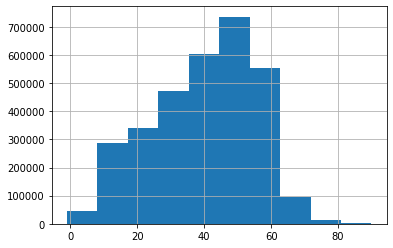

In [27]:
inail_df.Age.hist()
plt.show()

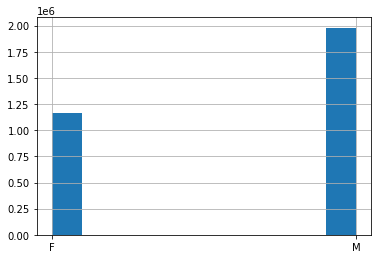

In [54]:
inail_df.Gender.hist()
plt.show()